In [51]:
import tensorflow as tf 
from tensorflow import keras
import numpy as np

In [52]:
tf.__version__

'2.10.1'

In [53]:
keras.__version__

'2.10.0'

In [54]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [55]:
training_dataset = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",  # Change label_mode to "categorical" for multi-class classification
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 70295 files belonging to 38 classes.


In [56]:
training_dataset

<BatchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [57]:
validation_dataset = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 17572 files belonging to 38 classes.


In [58]:
for x,y in training_dataset:
    print(x)
    print(y)
    break

tf.Tensor(
[[[[ 96.25  92.25 107.25]
   [ 88.    84.    99.  ]
   [ 95.75  91.75 106.75]
   ...
   [123.5  116.5  124.5 ]
   [118.5  111.5  119.5 ]
   [128.5  121.5  129.5 ]]

  [[ 98.5   94.5  109.5 ]
   [100.75  96.75 111.75]
   [101.75  97.75 112.75]
   ...
   [125.   118.   126.  ]
   [116.   109.   117.  ]
   [127.5  120.5  128.5 ]]

  [[102.5   98.5  113.5 ]
   [101.5   97.5  112.5 ]
   [101.75  97.75 112.75]
   ...
   [138.5  131.5  139.5 ]
   [127.   120.   128.  ]
   [124.5  117.5  125.5 ]]

  ...

  [[124.   129.   148.  ]
   [124.75 129.75 148.75]
   [132.25 137.25 156.25]
   ...
   [111.5  118.5  136.5 ]
   [122.   129.   147.  ]
   [126.75 133.75 151.75]]

  [[127.75 132.75 151.75]
   [122.5  127.5  146.5 ]
   [126.25 131.25 150.25]
   ...
   [117.25 124.25 142.25]
   [123.5  130.5  148.5 ]
   [122.   129.   147.  ]]

  [[114.75 119.75 138.75]
   [122.5  127.5  146.5 ]
   [119.5  124.5  143.5 ]
   ...
   [127.25 134.25 152.25]
   [120.5  127.5  145.5 ]
   [120.25 127.25 14

In [59]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential

In [60]:
model = Sequential()

In [61]:
### adding convolusion layer


In [62]:
model.add(Conv2D(filters=128, kernel_size=3, padding='same', activation='relu', input_shape=[128, 128, 3]))
model.add(Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

In [63]:
model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

In [64]:
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

In [65]:
# model.add(Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
# model.add(Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
# model.add(MaxPool2D(pool_size=2, strides=2))

In [66]:
# model.add(Conv2D(filters=512, kernel_size=3, padding='same', activation='relu'))
# model.add(Conv2D(filters=512, kernel_size=3, padding='same', activation='relu'))
# model.add(MaxPool2D(pool_size=2, strides=2))

In [67]:
# model.add(Dropout(0.25))
## model is not underfitting

In [68]:
model.add(Flatten())

In [69]:
model.add(Dense(units=1500,activation='relu'))

In [70]:
# model.add(Dropout(0.4))
### model is not under fitting

In [71]:
model.add(Dense(units=38,activation='softmax'))

In [72]:
## model compile

In [73]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [74]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 128, 128, 128)     3584      
                                                                 
 conv2d_17 (Conv2D)          (None, 128, 128, 128)     147584    
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 64, 64, 128)      0         
 2D)                                                             
                                                                 
 conv2d_18 (Conv2D)          (None, 64, 64, 64)        73792     
                                                                 
 conv2d_19 (Conv2D)          (None, 64, 64, 64)        36928     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 32, 32, 64)       0         
 2D)                                                  

In [75]:
traingin_history = model.fit(x = training_dataset ,validation_data = validation_dataset ,epochs=8) 

Epoch 1/8


2197/2197 [==============================] - 335s 152ms/step - loss: 1.1599 - accuracy: 0.6750 - val_loss: 0.4564 - val_accuracy: 0.8515
Epoch 2/8
2197/2197 [==============================] - 328s 149ms/step - loss: 0.3593 - accuracy: 0.8848 - val_loss: 0.5011 - val_accuracy: 0.8471
Epoch 3/8
2197/2197 [==============================] - 290s 132ms/step - loss: 0.2206 - accuracy: 0.9302 - val_loss: 0.4283 - val_accuracy: 0.8692
Epoch 4/8
2197/2197 [==============================] - 284s 129ms/step - loss: 0.1616 - accuracy: 0.9474 - val_loss: 0.5605 - val_accuracy: 0.8524
Epoch 5/8
2197/2197 [==============================] - 287s 131ms/step - loss: 0.1304 - accuracy: 0.9585 - val_loss: 0.5015 - val_accuracy: 0.8806
Epoch 6/8
2197/2197 [==============================] - 286s 130ms/step - loss: 0.1114 - accuracy: 0.9652 - val_loss: 0.4882 - val_accuracy: 0.8791
Epoch 7/8
2197/2197 [==============================] - 286s 130ms/step - loss: 0.1090 - accuracy: 0.9661 - val_loss: 0.5222 - va

In [76]:
tf.saved_model.save(model, 'my_model.keras')

# Assuming you have a model named 'model'
model.save('myy_model.h5')  # Save the model

# You can later load the model using:
# loaded_model = load_model('my_model.h5')


INFO:tensorflow:Assets written to: my_model.keras\assets


INFO:tensorflow:Assets written to: my_model.keras\assets


In [77]:
training_history = traingin_history

In [78]:
train_acc , train_loss = model.evaluate(training_dataset)

2197/2197 [==============================] - 104s 47ms/step - loss: 0.0606 - accuracy: 0.9819


In [79]:
print(train_acc , train_loss)

0.06060989201068878 0.9818621277809143


In [80]:
valid_acc,valid_loss = model.evaluate(validation_dataset)

550/550 [==============================] - 26s 47ms/step - loss: 0.5257 - accuracy: 0.8905


In [81]:
print(valid_acc,valid_loss)

0.5257335901260376 0.8904507160186768


In [82]:
## saving the model

In [83]:
model.save('PlantDiseaseModel.h5')

In [84]:
model.save('PlantDiseaseModel.keras')

visualisation of accuracy

In [85]:
training_history.history

{'loss': [1.1598652601242065,
  0.3592981994152069,
  0.22061248123645782,
  0.16156913340091705,
  0.1303805261850357,
  0.11144653707742691,
  0.10904210805892944,
  0.08709795027971268],
 'accuracy': [0.675012469291687,
  0.8848282098770142,
  0.9302226305007935,
  0.9473931193351746,
  0.9584892392158508,
  0.9652464389801025,
  0.9661284685134888,
  0.9729710221290588],
 'val_loss': [0.45639604330062866,
  0.5011323690414429,
  0.42825138568878174,
  0.5605114102363586,
  0.5015491247177124,
  0.48823902010917664,
  0.5222081542015076,
  0.5257331728935242],
 'val_accuracy': [0.8515251278877258,
  0.8470862507820129,
  0.8691668510437012,
  0.852378785610199,
  0.8806055188179016,
  0.8791258931159973,
  0.8857842087745667,
  0.8904507160186768]}

In [89]:
import matplotlib.pyplot as plt

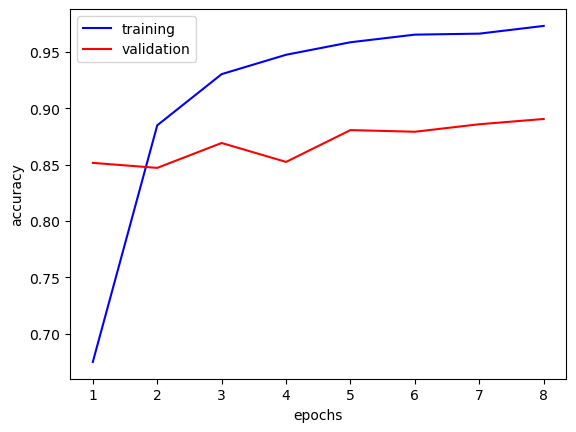

In [90]:
epochs = [i for i in range(1,9)]
plt.plot(epochs,training_history.history['accuracy'],color='blue',label = 'training')
plt.plot(epochs,training_history.history['val_accuracy'], color='red', label='validation')  # Added label for validation accuracy)
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend() 
plt.show()

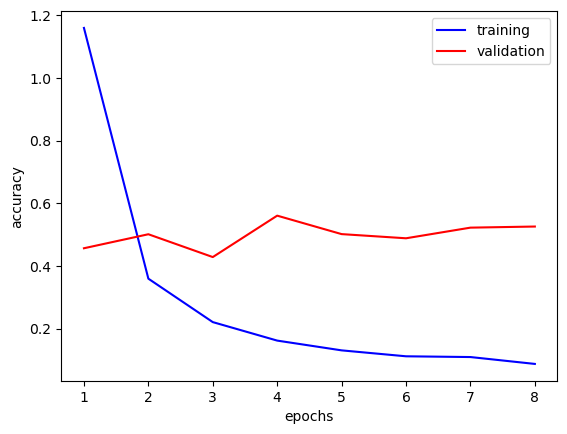

In [94]:
epochs = [i for i in range(1,9)]
plt.plot(epochs,training_history.history['loss'],color='blue',label = 'training')
plt.plot(epochs,training_history.history['val_loss'], color='red', label='validation')  # Added label for validation accuracy)
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend() 
plt.show()


In [92]:
test_dataset =  tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",  # Change label_mode to "categorical" for multi-class classification
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 17572 files belonging to 38 classes.


In [93]:
y_pred = model.predict(test_dataset)

550/550 [==============================] - 26s 46ms/step


In [95]:
model.save('mmy_89model.keras')